In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import db_url

In [32]:
# Create engine to connect database
engine = create_engine(f'{db_url}')
connection = engine.connect()

In [33]:
# query the employee table from database
employee_data = pd.read_sql("SELECT * FROM employees",connection)
employee_data.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [34]:
# Salary table
salary = pd.read_sql("SELECT * FROM salaries",connection)
salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [35]:
# title table
title = pd.read_sql("SELECT * FROM titles",connection)
title

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [36]:
# merge employee ans salary table
emp_salary = pd.merge(employee_data,salary, on="emp_no")
emp_salary

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


In [37]:
# merge title table with merged employee and salary table
emp_title = pd.merge(emp_salary,title,left_on="emp_title",right_on="title_id")
emp_title

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,s0001,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,s0001,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,s0001,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,s0001,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,s0001,Staff
...,...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446,m0001,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148,m0001,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026,m0001,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000,m0001,Manager


In [38]:
emp_reduced = emp_title[["title","salary"]]
emp_reduced.head()
emp_reduced["salary"] = emp_reduced["salary"].astype(float)
emp_reduced

C:\Users\13135\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,salary
0,Staff,40000.0
1,Staff,40000.0
2,Staff,56087.0
3,Staff,87084.0
4,Staff,63016.0
...,...,...
300019,Manager,72446.0
300020,Manager,71148.0
300021,Manager,60026.0
300022,Manager,40000.0


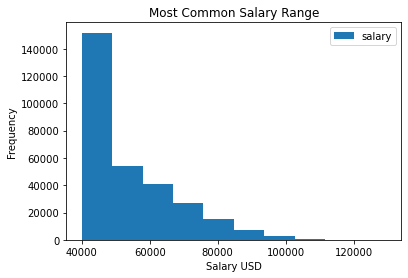

In [39]:
# employee salary ranges histogram
emp_reduced.plot.hist(by="salary")
plt.title("Most Common Salary Range")
plt.xlabel("Salary USD")
plt.show()

In [40]:
average_salary = emp_reduced.groupby(emp_reduced["title"]).mean()
average_salary

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


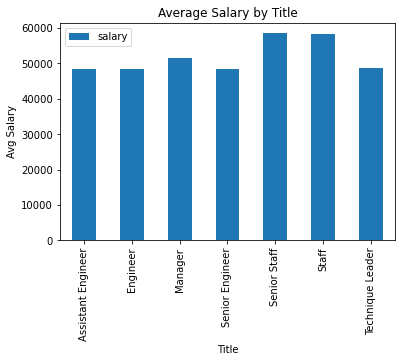

<Figure size 432x288 with 0 Axes>

In [41]:
average_salary.plot.bar()
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Avg Salary")
plt.show()
plt.tight_layout()